In [1]:
import os
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from threading import Thread, Event

In [2]:
class MemoryMonitor(Thread):

    def __init__(self, interval):
        Thread.__init__(self)
        self.daemon = True
        self.interval = interval
        self.process = psutil.Process(os.getpid())
        self.buffer = []
        self.stopped = Event()

    def monitor(self):
        self.buffer.append((time.time(), self.process.memory_info().rss))
        
    def run(self):
        while not self.stopped.wait(self.interval):
            self.monitor()

    def stop(self):
        self.stopped.set()

In [3]:
GB = 1024**3/8
SIZE = int(1.0*GB)

Text(0.5, 1.0, 'Peak=8770383872.0\nElapsed=8.559271812438965')

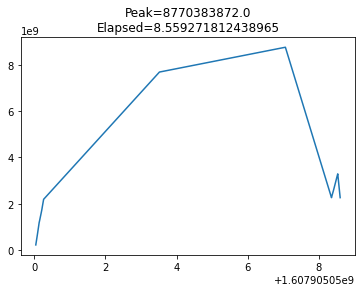

In [4]:
def malloc():
    data = np.ones(SIZE, dtype='float64')
    df = pd.DataFrame()
    df['MyCol'] = data
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=3297828864.0\nElapsed=0.15627193450927734')

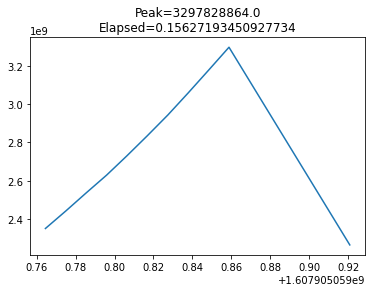

In [5]:
def malloc():
    data = np.ones(SIZE, dtype='float64')
    df = pd.DataFrame(data=data, columns=['MyCol'])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=5486817280.0\nElapsed=10.007827281951904')

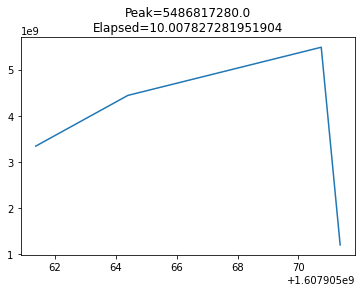

In [6]:
def malloc():
    data = [float(1.0)]*SIZE
    df = pd.DataFrame(data=data, columns=['MyCol'])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=2266783744.0\nElapsed=4.401722192764282')

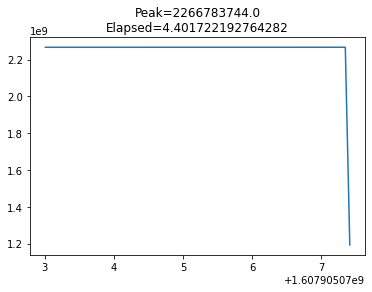

In [7]:
def malloc():
    data = np.array([float(1.0)]*SIZE, dtype='float64')
    df = pd.DataFrame(data=data, columns=['MyCol'])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=2267684864.0\nElapsed=4.254671096801758')

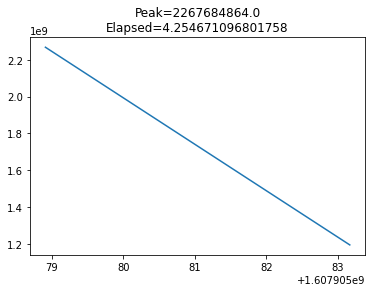

In [8]:
def malloc():
    data = np.empty(SIZE, dtype='float64')
    data[:] = [float(1.0)]*SIZE
    df = pd.DataFrame(data=data, columns=['MyCol'])
    return df

monitor = MemoryMonitor(0.01)
monitor.start()
df = malloc()
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))